In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plot_cmap_legend
import pickle

In [23]:
# Inputs
pthDL = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024'
pthim = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\5x'
WS = [[2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0],  # remove whitespace if 0, keep only whitespace if 1, keep both if 2
      [7, 6],  # first = add removed whitespace to this class, second = add removed tissue to this class
      [1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 10, 8, 11],  # rename classes according to this order
      [6, 5, 4, 11, 1, 2, 3, 8, 10, 12, 13, 7, 9],  # reverse priority of classes (left = bottom, right = top)
      []]  # List of annotations to delete
nm = '04_19_2024'
umpix = 2
cmap = np.array([[121, 248, 252],    # 1 islet
                 [0, 0, 255],         # 2 duct
                 [80, 237, 80],       # 3 blood vessel
                 [255, 255, 0],       # 4 fat
                 [149, 35, 184],      # 5 acinus
                 [255, 194, 245],     # 6 ecm
                 [255, 255, 255],     # 7 whitespace
                 [255, 0, 0],         # 8 LG PanIN
                 [73, 120, 111],      # 9 nerves
                 [0, 0, 0],           # 10 immune
                 [240, 159, 10]])     # 11 PDAC
sxy = 1000
classNames = ["islet","epithelium","vasculature", "fat" ,"acini","stroma", "nontissue", "PanIN", "nerves", "immune", "PDAC", "black"]

ntrain = 15
nvalidate = 3

In [24]:
if not os.path.isdir(pthDL):
        os.mkdir(pthDL)


print('Saving model metadata and classification colormap...')

if classNames[-1] != "black":
    classNames.append("black")

if classNames[-1] == "black":
    classNames.pop()


# fix WS and classNames if there are classes to delete
ndelete = WS[4]
if isinstance(ndelete, list):
    ndelete.sort(reverse=True)
    if ndelete:
        for b in ndelete:
            ncombine = WS[2]
            nload = WS[3]
            oldnum = ncombine[b - 1]
            ncombine[b - 1] = 1
            ncombine = [n - 1 if n > oldnum else n for n in ncombine]
            nload = [n for n in nload if n != b]

            if len(classNames) + 1 == max(WS[2]):
                zz = [i for i in range(len(classNames)) if i + 1 not in [b, oldnum]]
                classNames = [classNames[i] for i in zz]
                cmap = cmap[zz]

            WS[2] = ncombine

        WS[2] = ncombine
        WS[3] = nload
elif isinstance(ndelete, int):
    ncombine = WS[2]
    nload = WS[3]
    oldnum = ncombine[ndelete - 1]
    ncombine[ndelete - 1] = 1
    ncombine = [n - 1 if n > oldnum else n for n in ncombine]
    nload = [n for n in nload if n != ndelete]

    if len(classNames) == max(WS[2]):
        zz = [i for i in range(len(classNames)) if i + 1 not in [oldnum]]
        classNames = [classNames[i] for i in zz]
        cmap = cmap[zz]
    WS[2] = ncombine
    WS[3] = nload

nwhite = WS[2]
nwhite = nwhite[WS[1][0] - 1]
if max(WS[2]) != len(classNames):
    raise ValueError('The length of classNames does not match the number of classes specified in WS[2].')
if classNames[-1] != "black":
    classNames.append("black")
nblack = len(classNames)
existing_variables = {}


Saving model metadata and classification colormap...


In [25]:

datafile = os.path.join(pthDL.rstrip('\\'), 'net.pkl')
print(datafile)

\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024\net.pkl


Creating Net metadata file...


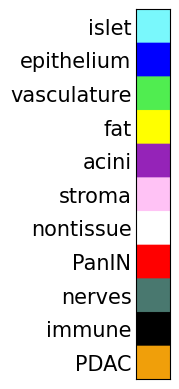

<Figure size 640x480 with 0 Axes>

In [26]:
# Save the data to a pickle file
if os.path.exists(datafile):
    print('Net file already exists, updating data...')
    with open(datafile, 'rb') as f:
        try:
            existing_data = pickle.load(f)
        except EOFError:
            existing_data = {}

    existing_data.update({"pthim": pthim,"pthDL": pthDL, "WS": WS,"nm":nm,"umpix": umpix,"cmap": cmap, "sxy": sxy, "classNames":classNames,"ntrain":ntrain,  "nblack": nblack, "nwhite": nwhite, "nvalidate":nvalidate})

    with open(datafile, 'wb') as f:
        pickle.dump(existing_data, f)
else:
        print('Creating Net metadata file...')
        with open(datafile, 'wb') as f:
            pickle.dump({"pthim": pthim,"pthDL": pthDL, "WS": WS,"nm":nm,"umpix": umpix,"cmap": cmap, "sxy": sxy, "classNames":classNames,"ntrain":ntrain,  "nblack": nblack, "nwhite": nwhite, "nvalidate":nvalidate}, f)


# plot color legend
plot_cmap_legend.plot_cmap_legend(cmap, classNames)
plt.savefig(os.path.join(pthDL, 'model_color_legend.png'))

In [29]:
# Load data from pickle file (example):
datafile = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024\net.pkl'
with open(datafile, 'rb') as f:
    data = pickle.load(f)
WS = data['WS']
cmap = data['cmap']
classnames = data['classNames']
nm = data['nm']
print(f'WS: {WS}')
print(f'classnames: {classnames}')
print(f'Model name: {nm}')


WS: [[2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0], [7, 6], [1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 10, 8, 11], [6, 5, 4, 11, 1, 2, 3, 8, 10, 12, 13, 7, 9], []]
classnames: ['islet', 'epithelium', 'vasculature', 'fat', 'acini', 'stroma', 'nontissue', 'PanIN', 'nerves', 'immune', 'PDAC', 'black']
Model name: 04_19_2024
